<a href="https://colab.research.google.com/github/bamyers2/tantiger/blob/main/01Summer2021Finalv2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import csv

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
age_data = pd.read_csv('gdrive/My Drive/age_gender.csv')

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [6]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 3:
        return 0
    elif row['age'] > 2 and row['age'] < 10:
        return 1
    elif row['age'] > 9 and row['age'] < 21:
        return 2
    elif row['age'] > 20 and row['age'] < 26:
        return 3
    elif row['age'] > 25 and row['age'] < 28:
        return 4
    elif row['age'] > 27 and row['age'] < 32:
        return 5
    elif row['age'] > 31 and row['age'] < 37:
        return 6
    elif row['age'] > 36 and row['age'] < 46:
        return 7
    elif row['age'] > 45 and row['age'] < 55:
        return 8
    elif row['age'] > 54 and row['age'] < 66:
        return 9
    else:
        return 10

In [7]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [8]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.93, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.32/0.6 , random_state=42)

In [10]:
len(X_valid)/(len(X_train)+len(X_valid)+len(X_test))

0.07002742037544822

In [11]:
len(X_train)/(len(X_train)+len(X_valid)+len(X_test))

0.4959713140687619

In [12]:
len(X_test)/(len(X_train)+len(X_valid)+len(X_test))

0.43400126555578994

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [14]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [15]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train1, y_train1, batch_size=32, epochs=7, verbose=1, validation_data=(X_valid1, y_valid1))


Train on 11757 samples, validate on 1660 samples
Epoch 1/7
11757/11757 [==============================] - 30s 3ms/step - loss: 2.3759 - accuracy: 0.1105 - val_loss: 2.3564 - val_accuracy: 0.1235
Epoch 2/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.3301 - accuracy: 0.1325 - val_loss: 2.2890 - val_accuracy: 0.1410
Epoch 3/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.2218 - accuracy: 0.1709 - val_loss: 2.0877 - val_accuracy: 0.2030
Epoch 4/7
11757/11757 [==============================] - 27s 2ms/step - loss: 2.0336 - accuracy: 0.2266 - val_loss: 1.9327 - val_accuracy: 0.2620
Epoch 5/7
11757/11757 [==============================] - 27s 2ms/step - loss: 1.9019 - accuracy: 0.2622 - val_loss: 1.8110 - val_accuracy: 0.3060
Epoch 6/7
11757/11757 [==============================] - 27s 2ms/step - loss: 1.7976 - accuracy: 0.3037 - val_loss: 1.7336 - val_accuracy: 0.3151
Epoch 7/7
11757/11757 [==============================] - 27s 2ms/step - lo

In [17]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

              precision    recall  f1-score   support

         1-2       0.84      0.80      0.82       736
         3-9       0.55      0.58      0.56       635
       10-20       0.28      0.34      0.31       787
       21-25       0.25      0.70      0.37      1174
       26-27       0.23      0.01      0.02      1245
       28-31       0.22      0.10      0.14      1081
       32-36       0.25      0.00      0.00      1116
       37-45       0.21      0.67      0.31      1095
       46-54       0.00      0.00      0.00       865
       55-65       0.36      0.13      0.19       848
      66-116       0.72      0.29      0.42       706

    accuracy                           0.31     10288
   macro avg       0.35      0.33      0.29     10288
weighted avg       0.32      0.31      0.25     10288



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

[[588 127  10   3   0   0   0   6   0   0   2]
 [112 368 122  22   0   0   0   9   0   0   2]
 [  0 104 269 329   2  16   0  67   0   0   0]
 [  0  12 133 824   4  59   0 142   0   0   0]
 [  1  12 109 784  12  88   0 238   0   0   1]
 [  0  10  89 532  10 110   1 327   0   1   1]
 [  0   4  49 423   8 100   1 525   0   4   2]
 [  0   6  53 212  10  70   0 732   0  10   2]
 [  0   7  37  82   6  41   1 636   0  44  11]
 [  0   3  39  33   1  16   1 589   0 108  58]
 [  0  21  34  12   0   2   0 296   0 135 206]]


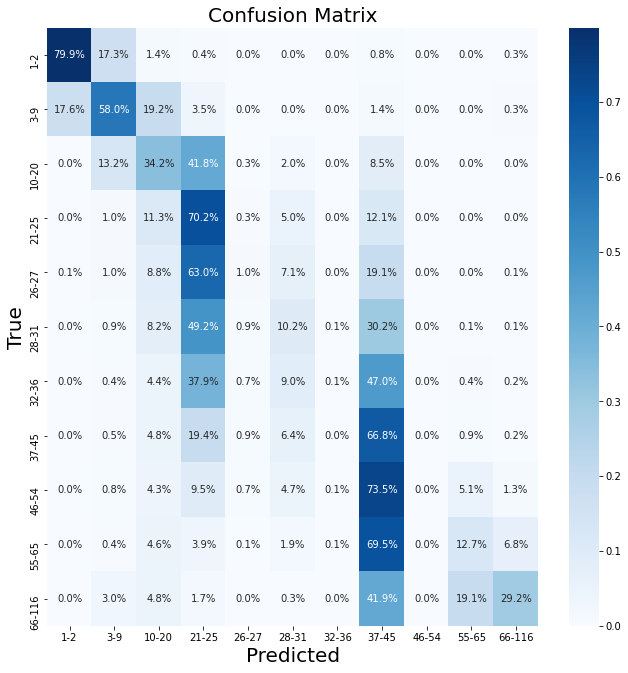

In [19]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [20]:
aa = pd.DataFrame(y_pred1)

In [21]:
aa.head()

,0
0,5
1,3
2,7
3,6
4,0


In [22]:
aaFinal = pd.DataFrame(y_test1)

In [23]:
aaFinal[0].values[1]

0.0

In [24]:
aaFinal['aa'] = aa[0]

In [25]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
def label_age (row):
    if row[row['aa']] == 1.0:
        return 1
    else:
        return 0

In [27]:
aaFinal['YorN'] = aaFinal.apply (lambda row: label_age(row), axis=1)

In [28]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa,YorN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [29]:
aaFinal.shape[0]

10288

In [30]:
X_test22 = X_test.tolist()

In [31]:
con = 0
for i in range(aaFinal.shape[0]):
    if aaFinal['YorN'].values[i] == 0:
        X_test22.remove(X_test22[i-con])
        con += 1

In [32]:
X_test22 = np.array(X_test22)

In [33]:
X_test22[0]

array(['9', '13', '14', ..., '10', '12', '15'], dtype='<U3')

In [34]:
X_test[1]

array(['36', '33', '32', ..., '28', '31', '25'], dtype='<U3')

In [35]:
X_test22 = X_test22.tolist()

In [36]:
X_test23 = X_test22

In [37]:
len(X_test22)

3218

In [38]:
div = int(round(len(X_test22) * .1, 0))

In [39]:
div

322

In [40]:
val = random.sample(X_test22, div)

In [41]:
train0 = []

for i in X_test22:
    if i not in val:
        train0.append(i)

In [42]:
val0 = []

for i in X_test22:
    if i in val:
        val0.append(i)

In [43]:
len(train0)/len(val0)

8.932098765432098

In [44]:
y_test22 = y_test.tolist()

In [45]:
y_train0 = []
y_val0 = []

for i in val0:
    y_val0.append(y_test22[X_test23.index(i)])

for i in train0:
    y_train0.append(y_test22[X_test23.index(i)])

In [46]:
len(y_train0)/len(y_val0)

8.932098765432098

In [47]:
train00 = pd.read_csv('gdrive/My Drive/train0.csv')
val00 = pd.read_csv('gdrive/My Drive/val0.csv')
y_train00 = pd.read_csv('gdrive/My Drive/y_train0.csv')
y_val00 = pd.read_csv('gdrive/My Drive/y_val0.csv')

In [48]:
train00 = train00.values.tolist()
val00 = val00.values.tolist()
y_train00 = y_train00.values.tolist()
y_val00 = y_val00.values.tolist()

In [49]:
print("train00: %s" %len(train00))
print("val00: %s" %len(val00))

train00: 725
val00: 81


In [50]:
y_train1 = y_train0 + y_train00
y_val1 = y_val0 + y_val00
train1 = train0 + train00
val1 = val0 + val00

In [51]:
print("train1: %s" %len(train1))
print("val1: %s" %len(val1))

train1: 3619
val1: 405


In [52]:
num = 0
for i in range(len(train0)):
  if train0.count(train0[i]) > 1:
    num += 1
print(num)

18


In [53]:
train1 = pd.DataFrame(train1)
val1 = pd.DataFrame(val1)
y_train1 = pd.DataFrame(y_train1)
y_val1 = pd.DataFrame(y_val1)

In [54]:
train1.to_csv('train1.csv', index=False)
val1.to_csv('val1.csv', index=False)
y_train1.to_csv('y_train1.csv', index=False)
y_val1.to_csv('y_val1.csv', index=False)